In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from algos import SHCLVND, ES, SHCLVND_dynamic, SHCLVND_perm, PseudoCGA, PseudoCGA_dyn
from algos.cost import draw_individual_array, draw_individual_list

## Evo stuff

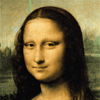

In [2]:
ref = Image.fromarray(np.array(Image.open('img/monalisa.png'))[:,:,:3])
ref

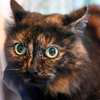

In [37]:
ref = Image.open('img/kot.jpg')
ref

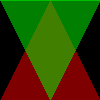

In [31]:
ref = Image.open('img/ref.png')
ref

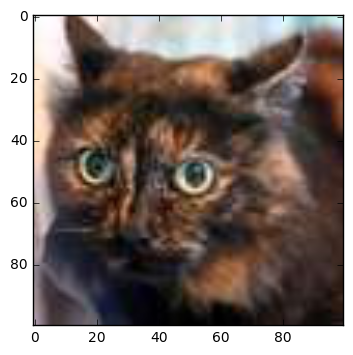

In [38]:
plt.imshow(ref)

## PCGA dyn

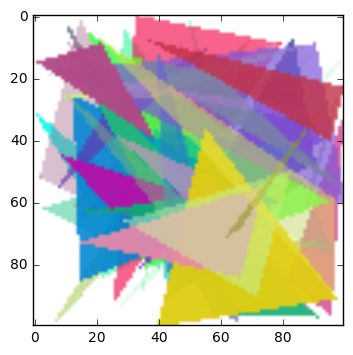

In [275]:
pcgad = PseudoCGA_dyn(1, 1, ref, max_num_figs=50, max_num_edges=10, add_pol_mut=.0, add_point_mut=.05)
plt.imshow(pcgad.best_img())

Score after 195000 iterations: -10315888
Score after 200000 iterations: -10299275
Score after 205000 iterations: -10284773
Score after 210000 iterations: -10172048
Score after 215000 iterations: -10160561
Score after 220000 iterations: -10128149
Score after 225000 iterations: -10117363
Score after 230000 iterations: -10092279
Score after 235000 iterations: -10078955
Score after 240000 iterations: -10064036
Score after 245000 iterations: -10052753
Score after 250000 iterations: -10039239
Score after 255000 iterations: -10022633
Score after 260000 iterations: -10010981
Score after 265000 iterations: -9990865
Score after 270000 iterations: -9983287
Score after 275000 iterations: -9968313
Score after 280000 iterations: -9955399
Score after 285000 iterations: -9941663
Score after 290000 iterations: -9853313
Score after 295000 iterations: -9843804
Score after 300000 iterations: -9836109
Score after 305000 iterations: -9827885
Score after 310000 iterations: -9820702
Score after 315000 iterati

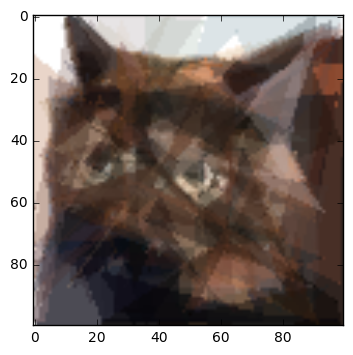

In [282]:
%%time
pcgad.train(210000, 5000)

In [276]:
len(pcgad.best_ind[0])

50

In [147]:
pcgad.save('kot_5m')

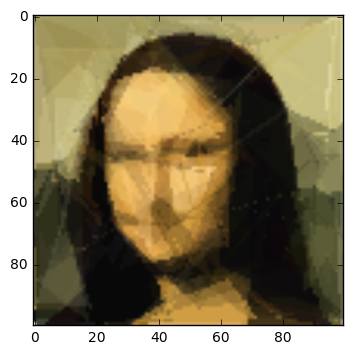

In [30]:
plt.imshow(pcgad.best_imgs[-20])

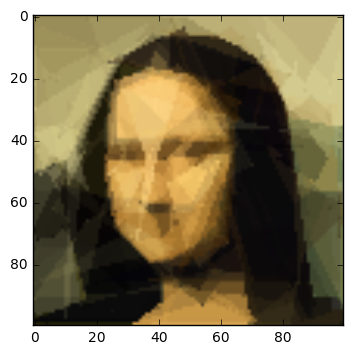

In [207]:
plt.imshow(pcgad.best_imgs[-50])

## Pseudo CGA

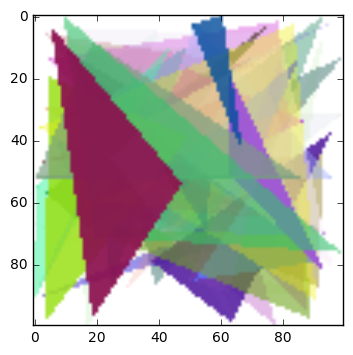

In [14]:
pcga = PseudoCGA(1, 10, ref, num_figs=50, num_edges=3)
plt.imshow(pcga.best_img())

Score after 1000 iterations: -896050704
Score after 2000 iterations: -672004012
Score after 3000 iterations: -579925558
Score after 4000 iterations: -525626973
Score after 5000 iterations: -448511678
Score after 6000 iterations: -404466097
Score after 7000 iterations: -384627329
Score after 8000 iterations: -346036179
Score after 9000 iterations: -323738585
Score after 10000 iterations: -298399572
Score after 11000 iterations: -281569867
Score after 12000 iterations: -266236423
Score after 13000 iterations: -262003006
Score after 14000 iterations: -257348428
Score after 15000 iterations: -253144451
Score after 16000 iterations: -247958705
Score after 17000 iterations: -229097160
Score after 18000 iterations: -226308384
Score after 19000 iterations: -223581783
Score after 20000 iterations: -213911369
Score after 21000 iterations: -211747690
Score after 22000 iterations: -207958373
Score after 23000 iterations: -204868871
Score after 24000 iterations: -203834337
Score after 25000 iterati

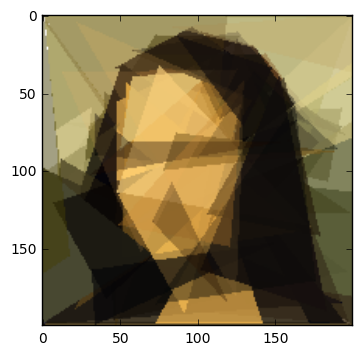

In [10]:
%%time
pcga.train(250000, 1000)

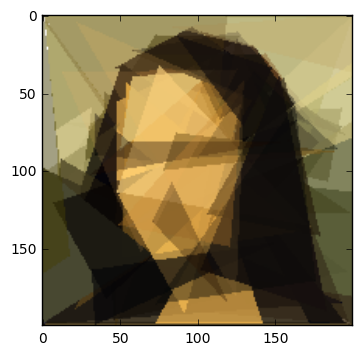

In [13]:
plt.imshow(pcga.best_imgs[-1])

In [20]:
pcga.save('mona_13m')

AttributeError: PseudoCGA instance has no attribute 'save'

In [21]:
name='mona_13m'
name = name + '_pcga_%i_%i_%i_%i_%i' % (pcga.pop_size, pcga.num_children, pcga.num_figs, 
                                                pcga.num_edges, pcga.iterations_done)
with open(name + '.pkl', 'w') as f:
    pickle.dump(pcga.log, f)
            
pcga.best_imgs[-1].save(name + '.png', 'png')

## ES

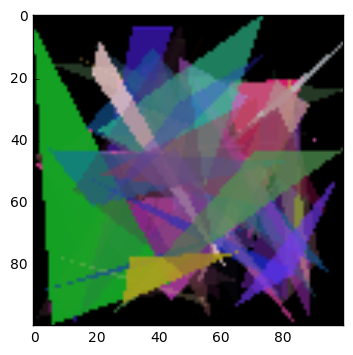

In [548]:
es = ES(1, 1, 1, 5, ref, num_figs=50, num_edges=3, cx=None, roulette=False)
plt.imshow(es.best_img())

Scores after 6100 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6200 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6300 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6400 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6500 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6600 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6700 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6800 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 6900 iterations: [-261794979, -261794979, -261794979, -261794979]
Scores after 7000 iterations: [-261794979, -261794979, -261794979, -261794979]
CPU times: user 1.07 s, sys: 44.1 ms, total: 1.11 s
Wall time: 1.05 s


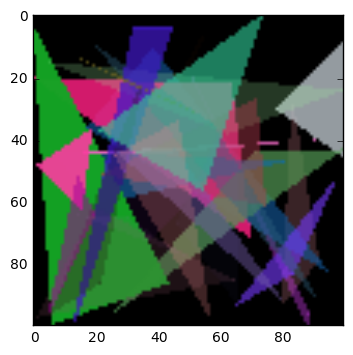

In [555]:
%%time
es.train(1000, 100)

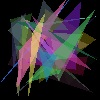

In [547]:
es.best_imgs[-1]

In [543]:
es.log_sigmas[-1]

array([  5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   9.23692330e-01,
         7.12863153e-01,   3.93115517e-01,   9.44836598e-01,
         3.70705045e-01,   4.32388889e-01,   4.39947104e-01,
         9.79127578e-01,   8.04009862e-01,   8.62964135e-01,
         2.38163794e-01,   4.49524142e-01,   5.64872889e-01,
         3.21716805e-01,   8.83920914e-01,   9.68770535e-01,
         6.07989038e-01,   3.47281420e-01,   4.92253665e-01,
         7.00472325e-01,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
         5.00000000e+00,

In [193]:
es.scores

array([-79409500, -76702522, -77360842, -77655618, -76255030, -76653277,
       -76725342, -76240915, -76278918, -76839849, -76660501, -76041781,
       -77355076, -77657577, -76911664, -76286306, -77393889, -76017507,
       -75964618, -77173659, -75161207, -74411669, -77455583, -72406746,
       -77660181, -75612281, -74377471, -75711650, -76566151, -68734110,
       -76310490, -70614116, -75763299, -77505001, -76144316, -76176818,
       -73169139, -77622742, -77041651, -76937777, -77403788, -77652357,
       -77668810, -78101673, -72389796, -77743472, -75727278, -77965271,
       -75773891, -78055693, -77873837, -75272023, -70854298, -77911662,
       -78141484, -75737101, -78322851, -71766383, -78212479, -78390770,
       -78481851, -78785253, -78704989, -78476365, -73266312, -78611252,
       -75565625, -78735428, -78552512, -71035864, -72921063, -78790892,
       -78806528, -71853222, -75097056, -71640117, -79031902, -74628396,
       -74279219, -78970198, -74976582, -78878763, 

# SHCLVND

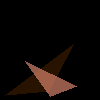

In [267]:
shclvnd = SHCLVND_perm(50, .1, .2, .999, ref, num_figs=2, num_edges=3, mode='polygon_simple')
shclvnd.best_img()

Score after 2110 iterations: -3573056
Score after 2120 iterations: -3573056
Score after 2130 iterations: -3573056
Score after 2140 iterations: -3573056
Score after 2150 iterations: -3573056
Score after 2160 iterations: -3573056
Score after 2170 iterations: -3573056
Score after 2180 iterations: -3573056
Score after 2190 iterations: -3573056
Score after 2200 iterations: -3573056
[[100   0   0   0  51  99   0  97   0  51]
 [  0  99  99 100  50   0  84  15   0  45]]
CPU times: user 1.23 s, sys: 3.95 ms, total: 1.24 s
Wall time: 1.23 s


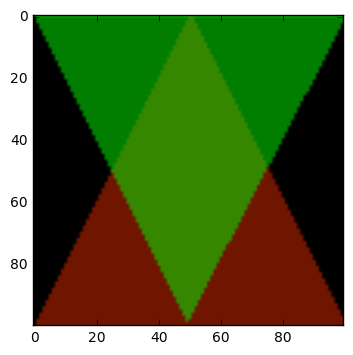

In [289]:
%%time
shclvnd.train(100, 10)
print (shclvnd.mus * 100).astype(int).reshape(2,-1)

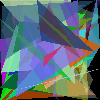

In [297]:
shclvnd_perm = SHCLVND_perm(50, .1, .2, .999, ref, num_figs=50, num_edges=3, mode='polygon_simple')
shclvnd_perm.best_img()

Score after 2100 iterations: -37386001
Score after 2200 iterations: -36371361
Score after 2300 iterations: -35746362
Score after 2400 iterations: -34319851
Score after 2500 iterations: -33928089
Score after 2600 iterations: -33356591
Score after 2700 iterations: -32368304
Score after 2800 iterations: -32368304
Score after 2900 iterations: -32368304
Score after 3000 iterations: -31777968
Score after 3100 iterations: -31511225
Score after 3200 iterations: -31396656
Score after 3300 iterations: -31239800
Score after 3400 iterations: -31009807
Score after 3500 iterations: -30948892
Score after 3600 iterations: -30694350
Score after 3700 iterations: -30467984
Score after 3800 iterations: -30423915
Score after 3900 iterations: -30423915
Score after 4000 iterations: -29812776
Score after 4100 iterations: -29812776
Score after 4200 iterations: -29812776
Score after 4300 iterations: -29812776
Score after 4400 iterations: -29460920
Score after 4500 iterations: -29343257
Score after 4600 iteratio

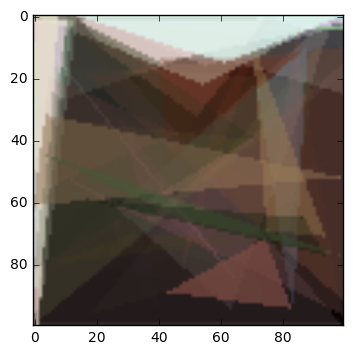

In [300]:
%%time
shclvnd_perm.train(10000, 100)
# print (shclvnd_perm.mus * 100).astype(int).reshape(2,-1)

array([[  0,   0,  99,   0,  50,  99,   0,  95,   3,  49],
       [ 99,  99,  50,   3,   0, 100,  89,  19,   0,  43]])

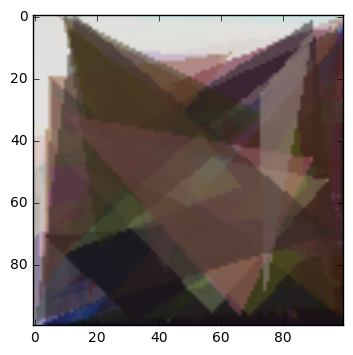

In [126]:
plt.imshow(shclvnd.best_img())

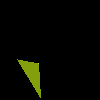

In [76]:
shclvnd_dyn = SHCLVND_dynamic(2, .1, .2, .999, ref, 50, max_num_figs=50, num_edges=3, mode='polygon_simple')
shclvnd_dyn.best_img()

Score after 10010 iterations: -42758377
Score after 10020 iterations: -42758377
Score after 10030 iterations: -42758377
Score after 10040 iterations: -42758377
Score after 10050 iterations: -42758377
Score after 10060 iterations: -42758377
Score after 10070 iterations: -42758377
Score after 10080 iterations: -42758377
Score after 10090 iterations: -42758377
Score after 10100 iterations: -42758377
Score after 10110 iterations: -42758377
Score after 10120 iterations: -42758377
Score after 10130 iterations: -42758377
Score after 10140 iterations: -42758377
Score after 10150 iterations: -42758377
Score after 10160 iterations: -42758377
Score after 10170 iterations: -42758377
Score after 10180 iterations: -42758377
Score after 10190 iterations: -42758377
Score after 10200 iterations: -42758377
Score after 10210 iterations: -42758377
Score after 10220 iterations: -42758377
Score after 10230 iterations: -42758377
Score after 10240 iterations: -42758377
Score after 10250 iterations: -42758377


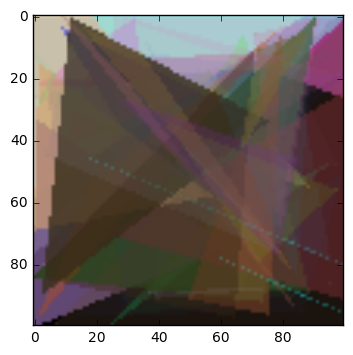

In [97]:
%%time
shclvnd_dyn.train(500, 10)

In [62]:
shclvnd.num_figs

21

In [63]:
shclvnd.sigmas

array([ 0.12127579,  0.12127579,  0.12127579,  0.12127579,  0.12127579,
        0.12127579,  0.12127579,  0.12127579,  0.12127579,  0.12127579,
        0.13283566,  0.13283566,  0.13283566,  0.13283566,  0.13283566,
        0.13283566,  0.13283566,  0.13283566,  0.13283566,  0.13283566,
        0.15128686,  0.15128686,  0.15128686,  0.15128686,  0.15128686,
        0.15128686,  0.15128686,  0.15128686,  0.15128686,  0.15128686,
        0.1543446 ,  0.1543446 ,  0.1543446 ,  0.1543446 ,  0.1543446 ,
        0.1543446 ,  0.1543446 ,  0.1543446 ,  0.1543446 ,  0.1543446 ,
        0.15746415,  0.15746415,  0.15746415,  0.15746415,  0.15746415,
        0.15746415,  0.15746415,  0.15746415,  0.15746415,  0.15746415,
        0.16389366,  0.16389366,  0.16389366,  0.16389366,  0.16389366,
        0.16389366,  0.16389366,  0.16389366,  0.16389366,  0.16389366,
        0.16389366,  0.16389366,  0.16389366,  0.16389366,  0.16389366,
        0.16389366,  0.16389366,  0.16389366,  0.16389366,  0.16

In [901]:
a.sigmas

array([ 0.07353908,  0.07353908,  0.07353908, ...,  0.07353908,
        0.07353908,  0.07353908])

## Experiments

In [265]:
# %%timeit
img2 = Image.new('LAB', (100, 100))
drw = ImageDraw.Draw(img2, 'LAB')
drw.polygon([(0., 0), (100.,0), (100., 1.), (0, 100)], (100, 128,  128))
drw.polygon([(0., 0), (100.,0), (100., 1.), (0, 100)], (100, 128,  128))
# drw.ellipse((30,30,70,70), (9110, -1738,  7621))

# plt.imshow(color.lab2rgb(img2))

In [266]:
a = np.array(img2, np.float64)
# a[:,:,0] /= 255
a[:,:,1:] -= 128
a

array([[[ 100., -128., -128.],
        [ 100., -128., -128.],
        [ 100., -128., -128.],
        ..., 
        [ 100., -128., -128.],
        [ 100., -128., -128.],
        [ 100., -128., -128.]],

       [[ 100., -128., -128.],
        [ 100., -128., -128.],
        [ 100., -128., -128.],
        ..., 
        [ 100., -128., -128.],
        [ 100., -128., -128.],
        [ 100., -128., -128.]],

       [[ 100., -128., -128.],
        [ 100., -128., -128.],
        [ 100., -128., -128.],
        ..., 
        [ 100., -128., -128.],
        [ 100., -128., -128.],
        [ 100., -128., -128.]],

       ..., 
       [[ 100., -128., -128.],
        [ 100., -128., -128.],
        [ 100., -128., -128.],
        ..., 
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[ 100., -128., -128.],
        [ 100., -128., -128.],
        [ 100., -128., -128.],
        ..., 
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [ 

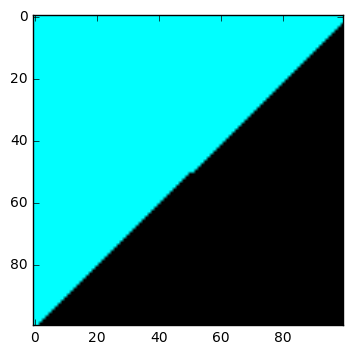

In [267]:
plt.imshow(color.lab2rgb(a))

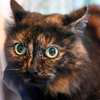

In [224]:
ref

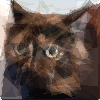

In [136]:
a = pcgad.best_imgs[-1]
a

In [146]:
%%timeit
(color.deltaE_ciede2000(color.rgb2lab(ref), color.rgb2lab(a))**2).sum()

100 loops, best of 3: 12.5 ms per loop


In [145]:
%%timeit
((np.array(ref, np.int32) - np.array(a, np.int32))**2).sum()

The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 115 µs per loop


In [168]:
color.rgb2lab(ref).dtype

dtype('float64')

In [79]:
color.rgb2lab(np.array([[[1.,1.,0.]]]))

array([[[ 97.13950704, -21.55468102,  94.47812228]]])

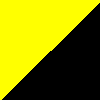

In [126]:
img2

In [51]:
ref.sha

AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [121]:
import skimage.color as color
import skimage.draw as draw

In [119]:
draw()

AttributeError: 'module' object has no attribute 'draw'

In [128]:
color.rgb2lab(np.array(img2, np.int32))

array([[[  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        ..., 
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05]],

       [[  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        ..., 
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05]],

       [[  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        [  7.71901118e-06,  -4.21072287e-06,   1.14595242e-05],
        

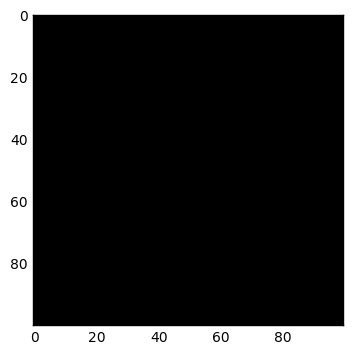

In [109]:
plt.imshow(color.lab2rgb(color.rgb2lab(np.array(img2, np.int32))))

In [19]:
from algos.cx import cx_one_point, cx_random

## Timers

In [170]:
test_pop = np.random.rand(POP_SIZE, NUM_POLS * POL_LEN).reshape(POP_SIZE / 2, 2, NUM_POLS * POL_LEN)

In [188]:
%%timeit
cx_random(test_pop)

1000 loops, best of 3: 188 µs per loop


In [189]:
%%timeit
cx_one_point(test_pop)

The slowest run took 6.51 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 152 µs per loop


In [206]:
test_ind = np.random.rand(NUM_POLS, POL_LEN)

In [227]:
%%timeit
img = draw_individual(test_ind, (100, 100))

1000 loops, best of 3: 957 µs per loop


In [10]:
%%timeit
dist(img, img)

1000 loops, best of 3: 262 µs per loop
